# Phenotypic stability and plasticity in GMP-derived cells as determined by their underlying regulatory network (Supplementary Information)

This R notebook provides the script used to construct the figures shown in the supplementary material. 

## 1. The BRN model of only well grounded interactions is not sufficient for main GMP patterns determination

As indicated in the text, the process of model construction was two-step. In the first step a Boolean Regulatory Network (BRN) was constructed with interactions whose direct regulation is known. The so constructed first version of the model is provided in the regulatoryNetworkGMPModelDirectInteractions.txt file. The next block of code is used to load the BRN model and to calculate its attractors.

In [1]:
# Loading dependencies
library(BoolNet)
library(reshape)
library(ggplot2)
library(igraph)

# Loading local scripts (found at https://github.com/caramirezal/RegulatoryNetworkGMPModel)
source("cellFateMap.R")
source("getTransitionMatrix.R")
source("simplifyCellFateMap.R")
source("tagAttractorsMatrix.R")
source("plotAttractors.a.R")
source("usefulFunctions.R")
source("getMutants.R")
source("whichPeturbations.R")

# Loading the regulatory network model of 
# well grounded direct interactions
net<-loadNetwork("regulatoryNetworkGMPModelDirectInteractions.txt")

# definition of the phenotype patterns. Note that in the full regulatory network model
# the marker ccr3 is added to distinguish between basophils and eosinophils phenotypes.
monocytes<-c("mcsfr"=1,"pu1"=1)
neutrophils<-c("lf"=1, "cebpa"=1)
eosinophils<-c("fceRIa"=1,"gata1"=1,"cebpa"=1,"mbp"=1)
basophils<-c("cebpa"=1,"gata2"=1,"runx1"=1,"mbp"=1)
mast<-c("mitf"=1,"ckit"=1,"cebpa"=0)
Lne<-c("mcsfr"=0,"lf"=0,"mbp"=0,"ckit"=0,"fceRIa"=0)
phenotypes<-list("monocytes"=monocytes,"neutrophils"=neutrophils,
                 "eosinophils"=eosinophils,"mast cells"=mast,
                 "Lne"=Lne,"basophils"=basophils)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



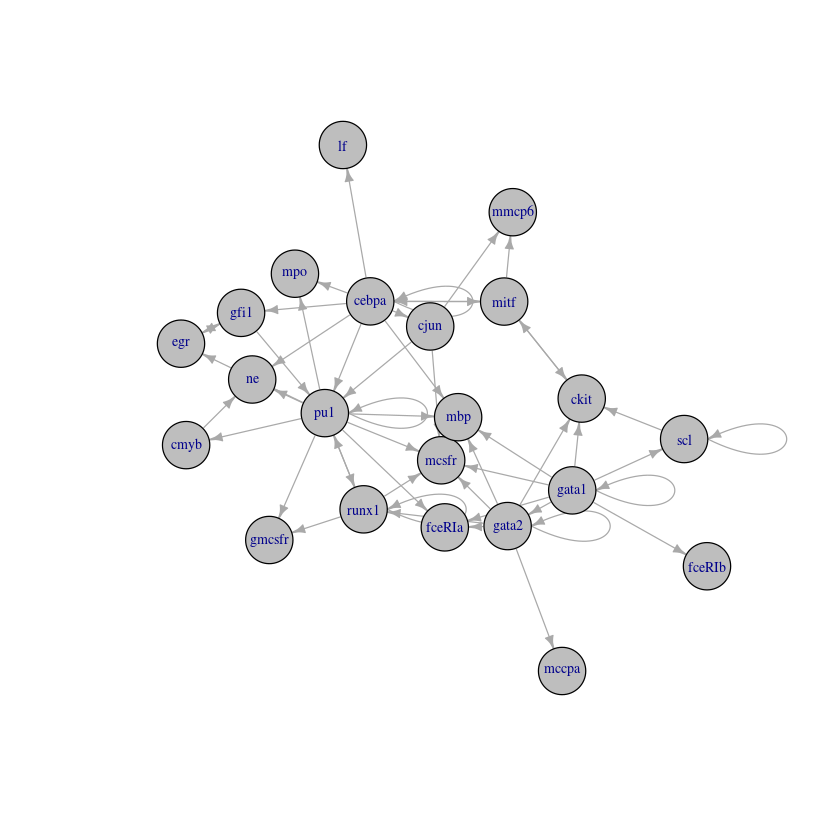

In [3]:
# Plotting the topology of the BRN model of only well grounded direct interactions
# The figure 1 was edited using igraph
plotNetworkWiring(net)

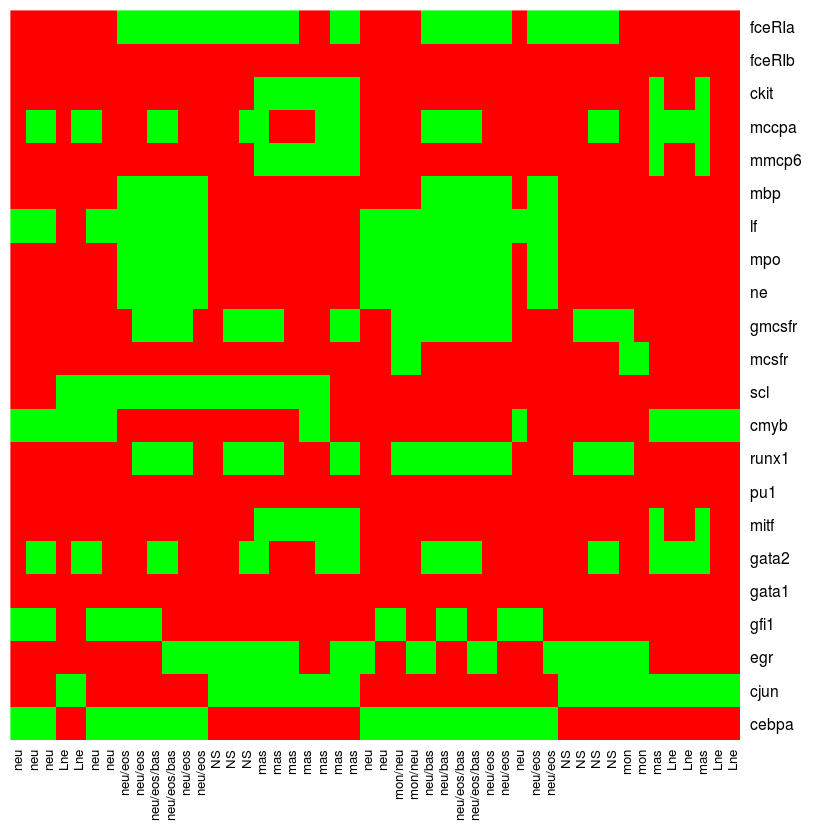

In [4]:
# calculating attractors of the BRN of well grounded direct interactions
attractors<-getAttractors(net, method = "sat.exhaustive")

# tag attractors according to the defintions given at the beginning
taggedAttractors<-tagAttractorsMatrix(net,attractors,phenotypes)

# Plotting the attractors
heatmap(taggedAttractors,Rowv = NA,Colv=NA, col=c("red","green"))

Note that attractors with none of the allready defined patterns were found (NS, for non-specified). Additionally, many attractors have more than one phenotype pattern tag. This attractors have therefore mixed attractor patterns. However, attractors with patterns similar to neutrophils (neu), monocytes (mon) and mast cells (mas) were found. Basophil pattern were missing. 

## 2. The full BRN GMP model

With the aim of finding the missing basophil pattern and also to avoid non biological meaningful mixed or NS patterns we added interactions to the model inferred from epigenetic experiments. These type of interactions could be indirect and can be regarded as model assumptions. The main benefit of doing that assumptions is that it provides a way to reduce the space of possible BRN models for the process. Additionally, it provides a theoretical framework to support the existence of that assumed restrictions. The following code load the full version BRN model and then performs the perturbation analysis.

In [9]:
# loading the full BRN model
net<-loadNetwork("regulatoryNetworkGMPModel.txt")

# definition of the phenotype patterns. In the full model
# CCR3, CEBPb, and IL3Ra signalling is added.
monocytes<-c("mcsfr"=1,"pu1"=1)
neutrophils<-c("lf"=1, "cebpa"=1)
eosinophils<-c("fceRIa"=1,"gata1"=1,"cebpa"=1,"ccr3"=1)
basophils<-c("cebpa"=1,"gata2"=1,"runx1"=1,"ccr3"=0)
mast<-c("mitf"=1,"ckit"=1,"cebpa"=0)
Lne<-c("mcsfr"=0,"lf"=0,"mbp"=0,"ckit"=0,"fceRIa"=0,"ccr3"=0)
phenotypes<-list("monocytes"=monocytes,"neutrophils"=neutrophils,
                 "eosinophils"=eosinophils,"mast cells"=mast,
                 "Lne"=Lne,"basophils"=basophils)

# calculate attractors
attractors<-getAttractors(net, method = "sat.exhaustive")

# tag attractors according to the defintions given at the beginning
taggedAttractors<-tagAttractorsMatrix(net,attractors,phenotypes)

attractors.nm<-colnames(taggedAttractors)
#"neu/GMP" has a neutrophil pattern, hence it is renamed "neu"
attractors.nm[which("neu/GMP"==attractors.nm)]<-"neu"
colnames(taggedAttractors)<-attractors.nm


## 3. Model robustness 

We performed the analysis of the robustness of the BRN model by randomly perturbating the Boolean functions and the quantifying the level of change in the dynamic caused by that perturbation. First we evaluated the level of conservation of attractors. The function takes the BRN model, the pertubates its Boolean logical rules creating a mutant version of the model. The percentage of attractors of the BRN model conserved in the mutant version is quantified and registered. This process is repeated n times using randomly created RN with the same conectivity of the BRN model. The distribution of the conserved attractors percentages is implemented in the next block of code and the result distribution is shown in the next figure. Since the process is computationally expensive we use for this analysis a simplified version of the BRN GMP model in which only regulator nodes are included, see the regulatoryNetworkGMPModelSimplified.txt. Since, the discarded nodes (CCR3, GMCSFR, MBP, NE, LF, MPO, MMCP6, MMCP1, MCSFR) are not regulators (in this model) the dynamic doesn't change but the phase space is reduced.  

A similar approach to analyze the network robustness is to assay changes in the trajectories before perturbations. The next algorithm randomly takes a state of the network and compare de distances between the next time states of the original model and that of perturbed version of the model (constructed as in the previous method).  

$hist
$breaks
 [1] 0.025 0.030 0.035 0.040 0.045 0.050 0.055 0.060 0.065 0.070 0.075 0.080
[13] 0.085 0.090 0.095

$counts
 [1]    29   329  1720  8426 15250 21941 26836 14205  7221  3188   655   162
[13]    36     2

$density
 [1]  0.058  0.658  3.440 16.852 30.500 43.882 53.672 28.410 14.442  6.376
[11]  1.310  0.324  0.072  0.004

$mids
 [1] 0.0275 0.0325 0.0375 0.0425 0.0475 0.0525 0.0575 0.0625 0.0675 0.0725
[11] 0.0775 0.0825 0.0875 0.0925

$xname
[1] "randomResults"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"

$pval
[1] 0.00029

$significant
[1] TRUE


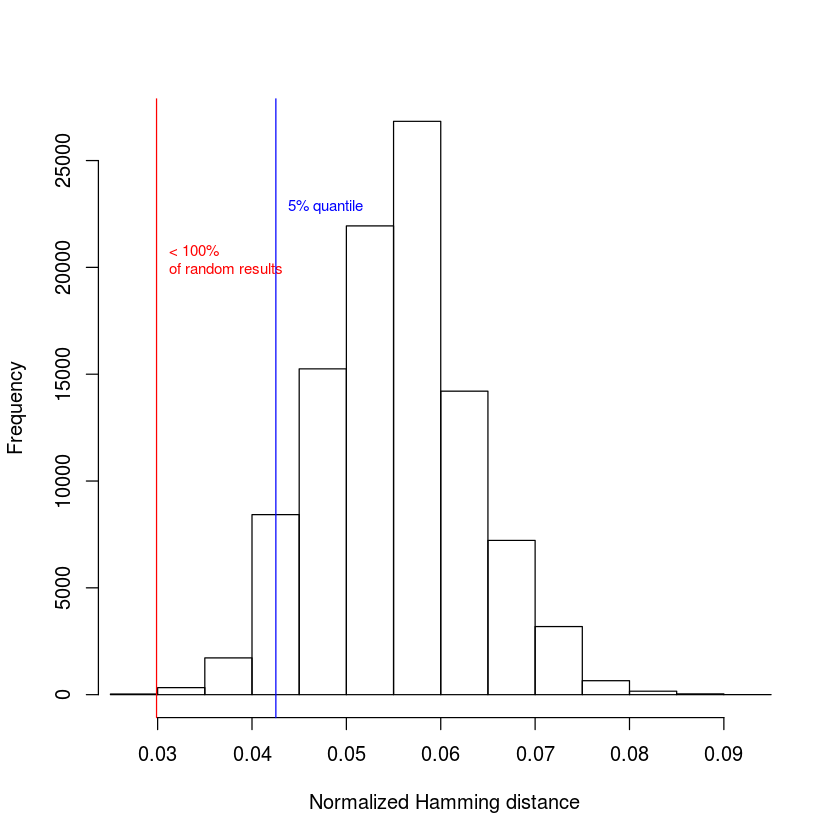

In [6]:
testNetworkProperties(net,numRandomNets = 100000, testFunction = "testTransitionRobustness",
                      testFunctionParams = list(numSamples=30),alternative = "less")


From the robustness analysis it can be seen that the GRN model tends conserve both attractors and trajectories with respect to randomly created netowrk with the same topology.

## 4. Simulation of loss of function mutants

Since many BRN model could in theory reach the same attractors patterns. We proceed to validate the model by simulating gain/loss of function mutants to compare with experimental available data. We simulate the loss (gain) of function mutant by keeping the value of node constantly OFF (ON) during all the simulation. We did this sistematically as shown in the next figure. 

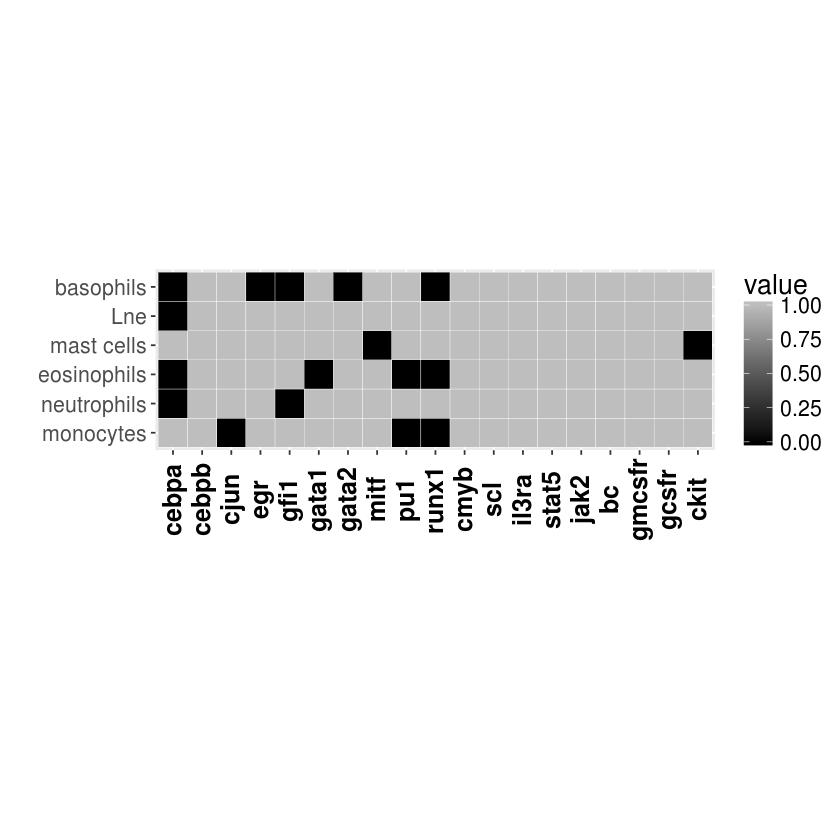

In [4]:
mutantsNull<-getMutants(net, phenotypes,fixed = 0)

# to fix the value of a non-regulator node does not change dynamics, so they are discarded.
# Only regulators are taken into account.
regulators<-findRegulators(net)

mutantsNull.r<-mutantsNull[regulators,]
mutantsNull.r<-binarizeMatrix(mutantsNull.r,1)

plotAttractors.a(mutantsNull.r)

Where gray (black) boxes represent the presence (absence) of at least one attractor of the pattern class. For example, in the C/EBPa loss of function mutant only mast cells and monocytes are found and attractors corresponding to neutrophils, eosinophils and basophils attractors classes are lost.

## 5. Transitions derived by single transient node perturbations

Our main purpose was to simulate the evolution of temporal expression patterns. However, if we only base our analysis solely on attractors the system is expected to remain in these states and no pattern evolution would be observed. Hence, attractors most be perturbed in some way in order to simulate pattern transitions. 
Our first approach was to simulate single transient node perturbations by flipping node values, that is if the node was ON then the value was changed to OFF and viceversa. This process was carried out sistematically for every node. 

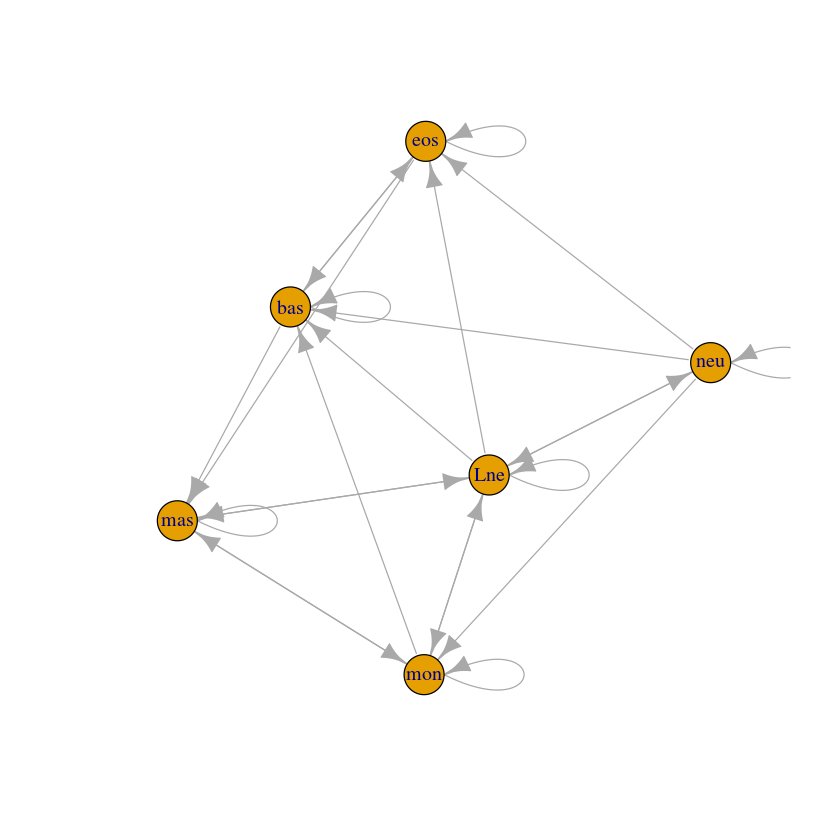

In [13]:
cfms<-cellFateMap(net=net, attractors=attractors,
                  type="asynchronous",
                  simpliflied = "yes",tag = "yes",
                  patternsList = phenotypes,
                  numberOfIterations=300)

threshold<-0

cfms.nm<-colnames(cfms)
#"neu/GMP" has a neutrophil pattern, hence it is renamed "neu"
cfms.nm[which("neu/GMP"==cfms.nm)]<-"neu"
colnames(cfms)<-cfms.nm
rownames(cfms)<-cfms.nm
# simplifying the cell fate map
cfms<-simplifyCellFateMap(cfms)

# plot simplified transition matrix in the form of a graph
cfms.g<-binarizeMatrix(cfms,threshold)
cfms.g<-graph.adjacency(cfms.g)
plot(cfms.g)

The following function is used to record the name of the perturbed node which caused a particular transition.

In [10]:
# the output result is saved in the whichPerturbations.txt file
whichPerturbations(net,attractors,
                   iterations = 1000,
                   attractorsNames = make.unique(attractors.nm) )


We wanted to assed which transitions were independent of the upating regimen chosen. Therefore, we repeated the analysis using synchronous updating. 

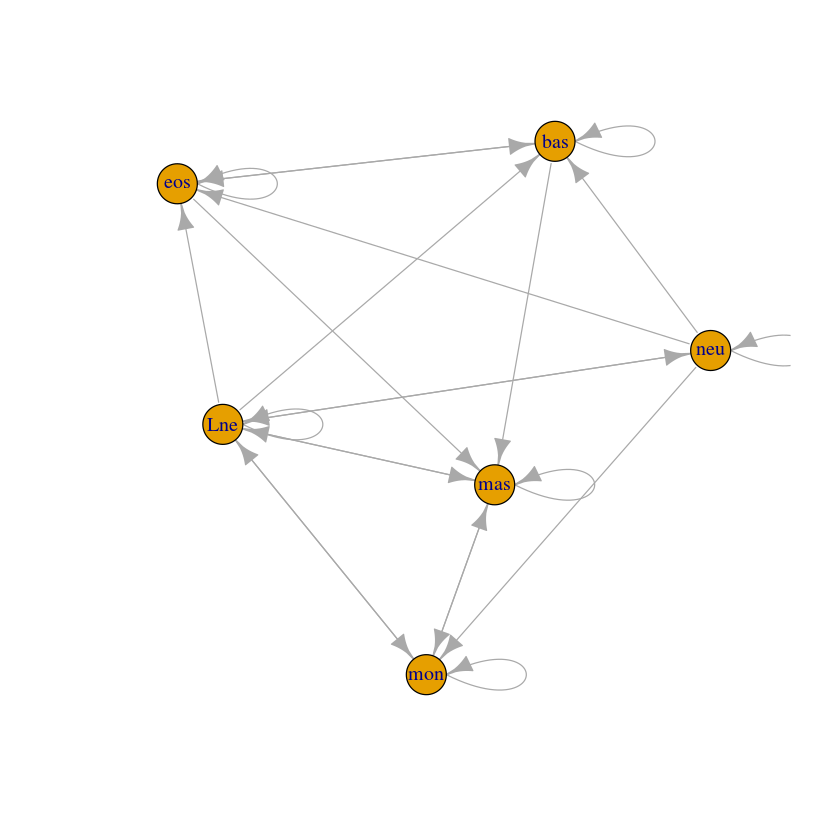

In [11]:
cfms<-cellFateMap(net=net, attractors=attractors,
                  type="synchronous",
                  simpliflied = "yes",tag = "yes",
                  patternsList = phenotypes)

threshold<-0

cfms.nm<-colnames(cfms)
#"neu/GMP" has a neutrophil pattern, hence it is renamed "neu"
cfms.nm[which("neu/GMP"==cfms.nm)]<-"neu"
colnames(cfms)<-cfms.nm
rownames(cfms)<-cfms.nm
# simplifying the cell fate map
cfms<-simplifyCellFateMap(cfms)

# plot simplified transition matrix in the form of a graph
cfms.g<-binarizeMatrix(cfms,threshold)
cfms.g<-graph.adjacency(cfms.g)
plot(cfms.g)

It can be seen that transitions patterns are conserved in general. For example, in both updating methods no transitions are observed from GMP to mast cells phenotypes.